### Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore')

1. **distance_from_home:** This could represent the distance between the location of the transaction and the cardholder's registered home address. Unusual distances might be flagged for further investigation.

2. **distance_from_last_transaction:** This feature may indicate the spatial gap between the current transaction and the last one. Sudden large distances could be a potential red flag for fraud.

3. **ratio_to_median_purchase_price:** This could be the ratio of the current purchase price to the median purchase price of the cardholder. Unusual ratios might indicate abnormal spending behavior.

4. **repeat_retailer:** Indicates whether the transaction involves a retailer that the cardholder has transacted with before. Frequent transactions with new retailers might be a sign of fraud.

5. **used_chip:** Whether the chip on the credit card was used for the transaction. Chip usage is generally considered more secure than magnetic stripe transactions.

6. **used_pin_number:** Indicates whether a PIN (Personal Identification Number) was used for the transaction. PIN usage adds an extra layer of security.

7. **online_order:** This binary feature likely indicates whether the transaction was conducted online. Online transactions can be more susceptible to fraud, so this information is crucial for risk assessment.

8. **fraud:** The target variable indicating whether the transaction is fraudulent or not. This is likely the label for the supervised learning task, with the goal of predicting fraud based on the other features.

In [2]:
cred_data = pd.read_csv('card_transdata.csv')

In [3]:
cred_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


<Axes: xlabel='fraud', ylabel='count'>

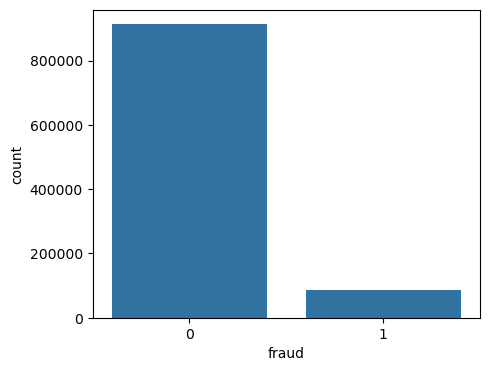

In [4]:
# Distribution of classes

plt.figure(figsize=(5,4))
sns.countplot(cred_data, x='fraud')

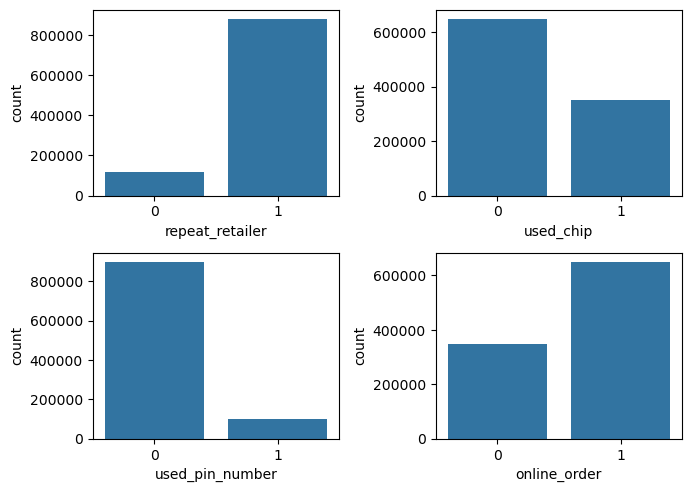

In [5]:
cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
fig = plt.figure(figsize=(7,5))
for index, col in enumerate(cols):
    plt.subplot(2,2, index+1)
    sns.countplot(data = cred_data, x=cred_data[col])
fig.tight_layout(pad=1.0)

In [6]:
cred_data.corr() # correlation between attributes

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


## DIFFERENTIAL PRIVACY

<p><font face='Verdana' >In credit card fraud detection, applying differential privacy to sensitive features like transaction distances, spending ratios, and transaction methods enhances privacy protection without sacrificing detection accuracy. By adding carefully calibrated noise to these features, differential privacy prevents the disclosure of individual transaction details while still allowing for effective fraud detection. This ensures compliance with privacy regulations and safeguards cardholders' sensitive information, thus fostering trust in the credit card system's security measures.</font></p>

In [13]:
# Defining class Differential Privacy
class DifferentialPrivacy:
    def __init__(self, epsilon):
        self.epsilon = epsilon

    # Initializing function laplace mechanism
    def laplace_mechanism(self, data):
        sensitivity = 1 
        beta = sensitivity / self.epsilon
        noise_shape = data.shape
        noise = np.random.laplace(0, beta, noise_shape)
        return data + noise

    # Initializing function exponential mechanism
    def exponential_mechanism(self, data, k=1):
        scores = np.random.exponential(scale=1/self.epsilon, size=len(data))
        selected_indices = np.argsort(scores)[:k]
        return data[selected_indices]

In [14]:
privacy_list = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'] # containing the specified attributes

# Specifying the privacy (epsilon) value
epsilon = 3.0
dp = DifferentialPrivacy(epsilon) # Initializing the Differential Privacy object with epsilon value

# Applying differenial privacy to each attributes specify in the privacy list
for list in privacy_list:
    privacy_data = cred_data[list].values
    noisy_privacy_data = dp.laplace_mechanism(privacy_data) # Applying the Laplace mechanism to the attribute's data
    cred_data[list] = noisy_privacy_data  # Updating the data with the noisy attribute data

In [15]:
privacy_list = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
for list1 in privacy_list:
    privacy_data1 = cred_data[list].values
    epsilon = 1.0
    dp = DifferentialPrivacy(epsilon)
    noisy_privacy_data1 = dp.exponential_mechanism(privacy_data1, k=1000000)
    cred_data[list] = noisy_privacy_data1

In [16]:
print("Original Privacy Data:", privacy_data)
print("Noisy Privacy Data:", noisy_privacy_data)

Original Privacy Data: [0 0 1 ... 1 1 1]
Noisy Privacy Data: [-0.06387718 -0.30524256  0.95035487 ...  0.59635748  1.23345248
  1.62501384]


In [17]:
print("Original Privacy Data:", privacy_data1)
print("Noisy Privacy Data:", noisy_privacy_data1)

Original Privacy Data: [ 0.70888513 -0.50346204  1.03003474 ...  0.99623778  0.39658624
 -0.52391625]
Noisy Privacy Data: [ 0.99511339 -0.00344031  1.05928185 ...  0.70204695  0.08298456
  1.286682  ]


<p><font face='Verdana'>Differential privacy, using methods like Laplace and exponential noise, adds randomness to sensitive attributes in the privacy list, safeguarding individual information. This is crucial in credit card fraud detection, ensuring privacy compliance and maintaining user trust by protecting transaction details. It helps balance data utility with strict privacy needs, making fraud detection systems more secure.</font></p>

In [18]:
def mechanism_score(original_data, noisy_data):
    scores = np.exp(-np.abs(original_data - noisy_data))
    probabilities = scores / np.sum(scores)
    threshold = 0.5
    utility_score = np.sum(probabilities[np.abs(original_data - noisy_data) < threshold])
    return utility_score

utility_score = mechanism_score(privacy_data, noisy_privacy_data)
print("Utility Score:", utility_score)

Utility Score: 0.864348801239346


In [19]:
def mechanism_score(original_data, noisy_data):
    scores = np.exp(-np.abs(original_data - noisy_data))
    probabilities = scores / np.sum(scores)
    threshold = 0.5
    utility_score = np.sum(probabilities[np.abs(original_data - noisy_data) < threshold])
    return utility_score

utility_score = mechanism_score(privacy_data1, noisy_privacy_data1)
print("Utility Score:", utility_score)

Utility Score: 0.6072382599249282


In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(privacy_data, noisy_privacy_data)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.22267688449365


<p><font face='Verdana'>A Mean Squared Error (MSE) value of 0.22 indicates the average squared difference between the original data and the data after applying differential privacy using the laplace mechanism.

A MSE value of 0.22 suggests that, on average, the noisy data obtained after applying differential privacy with the exponential mechanism deviates from the original data by approximately 0.22 units squared.

This value can help you gauge the extent to which the laplace mechanism affects the utility of the data. Lower MSE values indicate smaller deviations and thus better preservation of data utility, while higher values indicate larger deviations and potentially greater loss of utility.</font></p>

In [21]:
threshold = 0.5
preserved_ratio = np.mean(np.abs(privacy_data - noisy_privacy_data) < threshold)
preserved_percentage = preserved_ratio * 100
print("Preserved Percentage:", preserved_percentage)

Preserved Percentage: 77.6335


<p><font face='Verdana'>A preserved percentage of approximately 77% indicates that a significant portion of the data points have been preserved within the specified threshold after applying differential privacy.
    
This suggests that the differential privacy mechanism, as implemented, has successfully preserved most of the original data while still providing privacy guarantees. 

A high preserved percentage like this is generally desirable, as it indicates that the utility of the data has been maintained to a large extent despite the privacy-preserving transformation. </font></p>

<p><font face='Verdana'>In this credit card fraud detection project, differential privacy secures the data by adding calibrated noise, making it harder for unauthorized access to extract sensitive information. By controlling the amount of noise added with a privacy budget, it balances privacy protection with data utility for effective fraud detection. This approach ensures compliance with regulations, mitigates privacy risks, and maintains trust with customers regarding data handling.</font></p>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x = cred_data.iloc[0:50000, :-1]
y = cred_data.iloc[0:50000, -1:]

In [24]:
y.value_counts()

fraud
0        45683
1         4317
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [26]:
y.value_counts()

fraud
0        45683
1        45683
Name: count, dtype: int64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
epsilon = 0.1
dp = DifferentialPrivacy(epsilon)
x_train_noisy = dp.laplace_mechanism(x_train.values)
x_train_noisy

array([[ 13.41401899, -15.76638658,  10.43858103, ...,  -4.60647671,
          5.38169899,   8.41148502],
       [ -0.42129072,   0.66739943,   2.13323048, ...,   7.94190746,
         11.0553092 ,   3.69280215],
       [ 23.33250638,  20.30779151,  31.19996983, ...,  11.94843281,
         -6.57332121,   0.87768275],
       ...,
       [409.44463147,  17.01881828,   0.48138094, ...,  13.44116354,
          9.93762716,   3.60330314],
       [107.21803268,  13.80986662,   2.7297188 , ...,   8.31514162,
          2.2556093 ,   5.23521621],
       [ 18.76461282, -18.84114646, -10.85957098, ...,  16.49350661,
          2.97952063,   2.82765593]])

In [28]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.2, random_state=42)
epsilon = 0.1
dp = DifferentialPrivacy(epsilon)
x_train_noisy_1 = dp.exponential_mechanism(x_train_1.values, k=1000000)
x_train_noisy_1

array([[ 1.06764720e+00,  9.52881745e-01,  4.48686987e+00, ...,
         6.05945086e-01, -3.45807748e-01,  1.52857029e+00],
       [ 1.69893695e+02,  4.51808427e-01,  2.58408538e+00, ...,
         5.70385411e-01,  9.72851638e-03,  1.36914875e+00],
       [ 3.28742145e+01,  2.97563262e+00,  3.02875152e+00, ...,
         1.06134539e+00,  2.05465990e-01,  1.03502621e+00],
       ...,
       [ 1.06874286e+02,  3.43274542e+00,  3.98288526e+00, ...,
         1.29629635e+00, -6.09486237e-01,  1.20388718e+00],
       [ 4.31555693e+01,  4.67634699e+00,  1.22085186e-01, ...,
         3.57114139e-01,  9.59008350e-01,  6.39991067e-01],
       [ 1.19713442e+01,  1.31186136e-01,  6.99273720e-02, ...,
         1.94132667e-01, -1.85715539e-01,  4.79541709e-01]])

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

### MODEL PREDICTION ON LAPLACE MECHANISM

In [36]:
# RANDOM FOREST

rf = RandomForestClassifier()
clf_rf = rf.fit(x_train_noisy, y_train)
y_pred = clf_rf.predict(x_test)
acc2 = accuracy_score(y_test, y_pred)
print('--RANDOM FOREST CLASSIFIER ACCURACY--: ', acc2)

--RANDOM FOREST CLASSIFIER ACCURACY--:  0.7785378132866367


In [37]:
# DECISION TREE CLASSIFIER

dt = DecisionTreeClassifier()
clf_dt = dt.fit(x_train_noisy, y_train)
y_pred = clf_dt.predict(x_test)
acc3 = accuracy_score(y_test, y_pred)
print('--DECISION TREE ACCURACY--: ', acc3)

--DECISION TREE ACCURACY--:  0.6153004268359418


In [38]:
# LOGISTIC REGRESSION

log = LogisticRegression()
clf_log = log.fit(x_train_noisy, y_train)
y_pred = clf_log.predict(x_test)
acc3 = accuracy_score(y_test, y_pred)
print('--LOGISTIC REGRESSION ACCURACY--: ', acc3)

--LOGISTIC REGRESSION ACCURACY--:  0.672485498522491


### MODEL PREDICTION ON EXPONENTIAL MECHANISM

In [39]:
rf = RandomForestClassifier()
clf_rf = rf.fit(x_train_noisy_1, y_train_1)
y_pred_1 = clf_rf.predict(x_test_1)
acc2 = accuracy_score(y_test_1, y_pred1)
print('--RANDOM FOREST CLASSIFIER ACCURACY--: ', acc2)

--RANDOM FOREST CLASSIFIER ACCURACY--:  0.3245594834190653


In [40]:
dt = DecisionTreeClassifier()
clf_dt = dt.fit(x_train_noisy_1, y_train_1)
y_pred_1 = clf_dt.predict(x_test_1)
acc3 = accuracy_score(y_test_1, y_pred_1)
print('--DECISION TREE ACCURACY--: ', acc3)

--DECISION TREE ACCURACY--:  0.5044872496443034


In [42]:
log = LogisticRegression()
clf_log = log.fit(x_train_noisy_1, y_train_1)
y_pred_1 = clf_log.predict(x_test_1)
acc3 = accuracy_score(y_test_1, y_pred_1)
print('--LOGISTIC REGRESSION ACCURACY--: ', acc3)

--LOGISTIC REGRESSION ACCURACY--:  0.3245594834190653


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


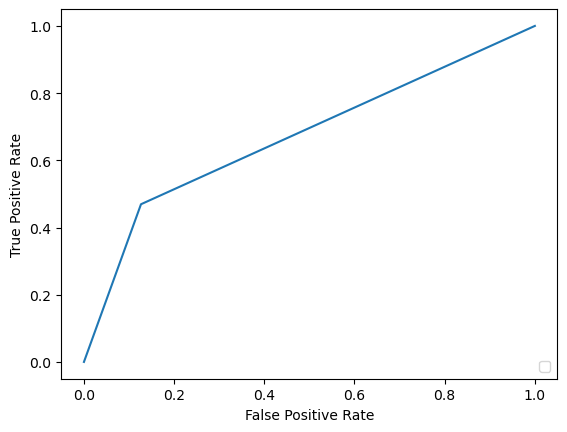

In [55]:
# ROC Curve Display
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

### Gradio App

In [30]:
import pyttsx3

In [31]:
def speak_text(text):
    engine = pyttsx3.init()
    engine.say(text)
    engine.runAndWait()

In [32]:
def load_fraud_detection_model():
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    return model

In [33]:
def predict_fraud(model, input_data):
    prediction = model.predict(input_data)
    return prediction

In [34]:
import gradio as gr
fraud_detection_model = load_fraud_detection_model()

input_columns = ['distance_from_home', 'distance_from_last_transaction',
                  'ratio_to_median_purchase_price', 'repeat_retailer',
                  'used_chip', 'used_pin_number', 'online_order']
inputs = [gr.Textbox(label=col.replace('_', ' ').title()) for col in input_columns]
outputs = gr.Textbox(label="Fraud Prediction")

def predict_fraud_wrapper(*input_values):
    input_data = np.array(input_values).reshape(1, -1)
    prediction = predict_fraud(fraud_detection_model, input_data)
    result_text = "Fraud Detected" if prediction == 1 else "No Fraud"
    speak_text(result_text)
    return result_text

interface = gr.Interface(fn=predict_fraud_wrapper, inputs=inputs, outputs=outputs,
                         title="Credit Card Fraud Detector", description="Predict fraud based on credit card features.")

interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [61]:
interface.close()

Closing server running on port: 7860
